Libraries

In [1]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import urllib.request as req
import json
import time
import pandas as pd
from pytz import timezone
import matplotlib.pyplot as plt

Collecting for all months

In [2]:
def for_each_month(fn):
    start_date = dt.datetime(2018, 4, 1)
    end_of_all = dt.datetime(2019, 4, 1)
    while start_date < end_of_all:
        next_month = start_date + relativedelta(months=1)
        end_date = next_month - relativedelta(days=1)
        fn(start_date, end_date)
        start_date = next_month
        
@for_each_month
def print_interval(start_date, end_date):
    print(start_date, 'to', end_date)

2018-04-01 00:00:00 to 2018-04-30 00:00:00
2018-05-01 00:00:00 to 2018-05-31 00:00:00
2018-06-01 00:00:00 to 2018-06-30 00:00:00
2018-07-01 00:00:00 to 2018-07-31 00:00:00
2018-08-01 00:00:00 to 2018-08-31 00:00:00
2018-09-01 00:00:00 to 2018-09-30 00:00:00
2018-10-01 00:00:00 to 2018-10-31 00:00:00
2018-11-01 00:00:00 to 2018-11-30 00:00:00
2018-12-01 00:00:00 to 2018-12-31 00:00:00
2019-01-01 00:00:00 to 2019-01-31 00:00:00
2019-02-01 00:00:00 to 2019-02-28 00:00:00
2019-03-01 00:00:00 to 2019-03-31 00:00:00


In [3]:
@for_each_month
def collect(start_date, end_date):
    url = 'https://api.weather.com/v1/geocode/39.95233/-75.16379/observations/historical.json' + \
          '?apiKey=6532d6454b8aa370768e63d6ba5a832e' + \
          '&startDate=' + start_date.strftime("%Y%m%d") + \
          '&endDate=' + end_date.strftime("%Y%m%d") + \
          '&units=m'
    print(url)
    response = req.urlopen(url)
    with open('../../data/philadelphia/training-sets/weather/weather-' + start_date.strftime("%Y%m") +  '.json', 'w') as f:
        for line in response:
            f.write(line.decode())
    time.sleep(0.5)

https://api.weather.com/v1/geocode/39.95233/-75.16379/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20180401&endDate=20180430&units=m
https://api.weather.com/v1/geocode/39.95233/-75.16379/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20180501&endDate=20180531&units=m
https://api.weather.com/v1/geocode/39.95233/-75.16379/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20180601&endDate=20180630&units=m
https://api.weather.com/v1/geocode/39.95233/-75.16379/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20180701&endDate=20180731&units=m
https://api.weather.com/v1/geocode/39.95233/-75.16379/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20180801&endDate=20180831&units=m
https://api.weather.com/v1/geocode/39.95233/-75.16379/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20180901&endDate=20180930&units=

Loading all data into a dataframe

In [4]:
df_list = []

@for_each_month
def mount_df(start_date, _):
    print(start_date)
    fname = '../../data/philadelphia/training-sets/weather/weather-' + start_date.strftime("%Y%m") + '.json'
    with open(fname) as f:
        text = f.read()
    data = json.loads(text)
    df_list.append(pd.DataFrame(data['observations']))
    
weather_raw = pd.concat(df_list).reset_index(drop=True)
print(len(weather_raw), 'observations')
weather_raw.head()

2018-04-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00
2018-07-01 00:00:00
2018-08-01 00:00:00
2018-09-01 00:00:00
2018-10-01 00:00:00
2018-11-01 00:00:00
2018-12-01 00:00:00
2019-01-01 00:00:00
2019-02-01 00:00:00
2019-03-01 00:00:00
12055 observations


key        class  expire_time_gmt obs_id      obs_name  valid_time_gmt  \
0  KPHL  observation       1522565640   KPHL  Philadelphia      1522558440   
1  KPHL  observation       1522569240   KPHL  Philadelphia      1522562040   
2  KPHL  observation       1522572840   KPHL  Philadelphia      1522565640   
3  KPHL  observation       1522576440   KPHL  Philadelphia      1522569240   
4  KPHL  observation       1522580040   KPHL  Philadelphia      1522572840   

  day_ind  temp  wx_icon  icon_extd  ... clds  water_temp primary_wave_period  \
0       N     8       27       2700  ...  BKN        None                None   
1       N     7       33       3300  ...  FEW        None                None   
2       N     7       27       2700  ...  BKN        None                None   
3       N     7       26       2600  ...  OVC        None                None   
4       N     7       26       2600  ...  OVC        None                None   

   primary_wave_height  primary_swell_period  primary_swell_height  \
0                 None                  None                  None   
1                 None                  None                  None   
2                 None                  None                  None   
3                 None                  None                  None   
4                 None                  None                  None   

   primary_swell_direction  secondary_swell_period  secondary_swell_height  \
0                     None                    None                    None   
1                     None                    None                    None   
2                     None                    None                    None   
3                     None                    None                    None   
4                     None                    None                    None   

   secondary_swell_direction  
0                       None  
1                       None  
2                       None  
3                       None  
4                       None  

[5 rows x 45 columns]

Philadelphia times

In [5]:
def convert(gmt_time):
    gmt_time = dt.datetime.utcfromtimestamp(gmt_time)
    gmt_time = timezone('UTC').localize(gmt_time)
    local_time = gmt_time.astimezone(timezone('US/Eastern'))
    return local_time.replace(tzinfo=None)

weather_raw['valid_time_philadelphia'] = weather_raw['valid_time_gmt'].apply(convert)
print('Min date:', weather_raw['valid_time_philadelphia'].min())
print('Max date:', weather_raw['valid_time_philadelphia'].max())
weather_raw['valid_time_philadelphia'].head(10)

Min date: 2018-04-01 00:54:00
Max date: 2019-03-31 23:54:00


0   2018-04-01 00:54:00
1   2018-04-01 01:54:00
2   2018-04-01 02:54:00
3   2018-04-01 03:54:00
4   2018-04-01 04:54:00
5   2018-04-01 05:54:00
6   2018-04-01 06:54:00
7   2018-04-01 07:54:00
8   2018-04-01 08:54:00
9   2018-04-01 09:54:00
Name: valid_time_philadelphia, dtype: datetime64[ns]

In [6]:
weather_raw.columns

Index(['key', 'class', 'expire_time_gmt', 'obs_id', 'obs_name',
       'valid_time_gmt', 'day_ind', 'temp', 'wx_icon', 'icon_extd',
       'wx_phrase', 'pressure_tend', 'pressure_desc', 'dewPt', 'heat_index',
       'rh', 'pressure', 'vis', 'wc', 'wdir', 'wdir_cardinal', 'gust', 'wspd',
       'max_temp', 'min_temp', 'precip_total', 'precip_hrly', 'snow_hrly',
       'uv_desc', 'feels_like', 'uv_index', 'qualifier', 'qualifier_svrty',
       'blunt_phrase', 'terse_phrase', 'clds', 'water_temp',
       'primary_wave_period', 'primary_wave_height', 'primary_swell_period',
       'primary_swell_height', 'primary_swell_direction',
       'secondary_swell_period', 'secondary_swell_height',
       'secondary_swell_direction', 'valid_time_philadelphia'],
      dtype='object')

According to available in hourly forecast (for new predictions)
* Selecting the most indicative numeric variables

In [7]:
consider_only = [
    'dewPt', 'feels_like', 'heat_index', 'precip_hrly',
    'rh', 'temp', 'vis', 'wc', 'wspd'
]

In [8]:
for i in consider_only:
    print('---', i)
    print(weather_raw[i].value_counts().head(5))
    print()

--- dewPt
21    748
22    688
19    539
17    487
23    448
Name: dewPt, dtype: int64

--- feels_like
23.0    620
21.0    556
24.0    545
22.0    529
3.0     485
Name: feels_like, dtype: int64

--- heat_index
23    620
21    556
6     548
24    545
22    529
Name: heat_index, dtype: int64

--- precip_hrly
0.00    10080
0.25      584
0.51      273
0.76      177
1.02      129
Name: precip_hrly, dtype: int64

--- rh
93     1100
96      687
90      532
97      500
100     434
Name: rh, dtype: int64

--- temp
23    620
21    556
6     548
24    543
22    529
Name: temp, dtype: int64

--- vis
16.0    8107
11.0     602
4.0      526
9.0      524
8.0      502
Name: vis, dtype: int64

--- wc
23.0    620
21.0    556
24.0    543
22.0    529
3.0     485
Name: wc, dtype: int64

--- wspd
11.0    1149
9.0     1147
7.0     1116
13.0    1108
15.0    1025
Name: wspd, dtype: int64



Null values

In [9]:
for i in consider_only:
    print('---', i)
    print(weather_raw[i].isnull().value_counts())
    print()

--- dewPt
False    12055
Name: dewPt, dtype: int64

--- feels_like
False    12054
True         1
Name: feels_like, dtype: int64

--- heat_index
False    12055
Name: heat_index, dtype: int64

--- precip_hrly
False    12055
Name: precip_hrly, dtype: int64

--- rh
False    12055
Name: rh, dtype: int64

--- temp
False    12055
Name: temp, dtype: int64

--- vis
False    12055
Name: vis, dtype: int64

--- wc
False    12051
True         4
Name: wc, dtype: int64

--- wspd
False    12051
True         4
Name: wspd, dtype: int64



Evolution

--- dewPt
Min: -26
Max: 25


/home/eferreira/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


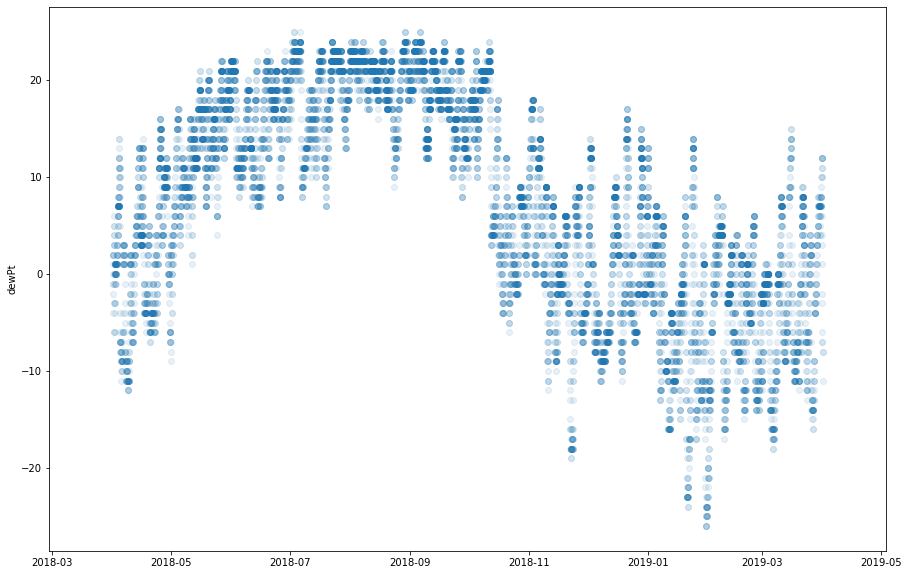

--- feels_like
Min: -23.0
Max: 43.0


--- heat_index
Min: -14
Max: 43


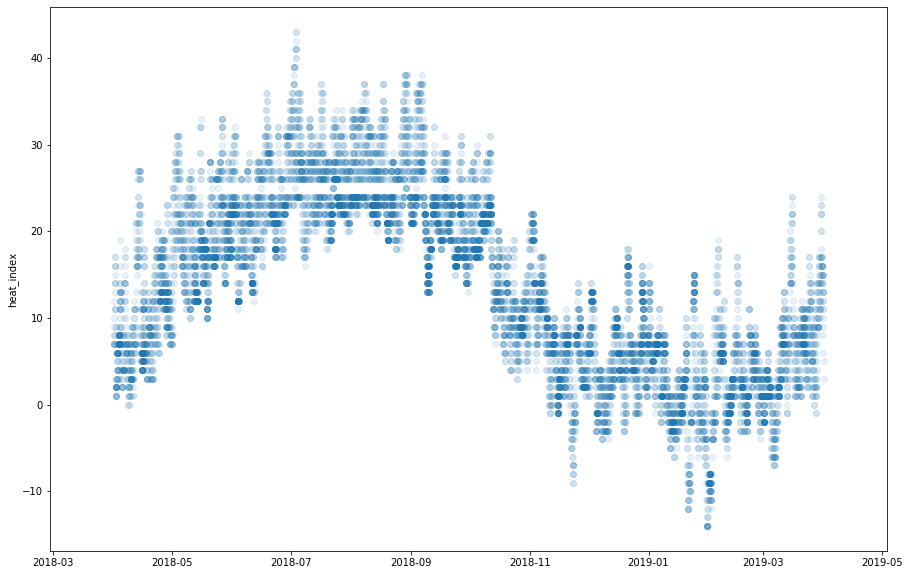

--- precip_hrly
Min: 0.0
Max: 72.14


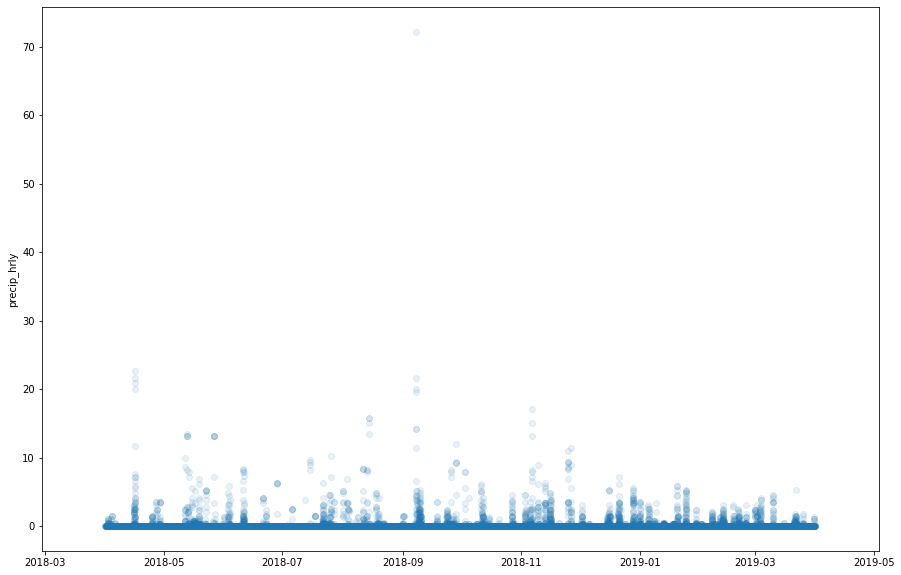

--- rh
Min: 14
Max: 100


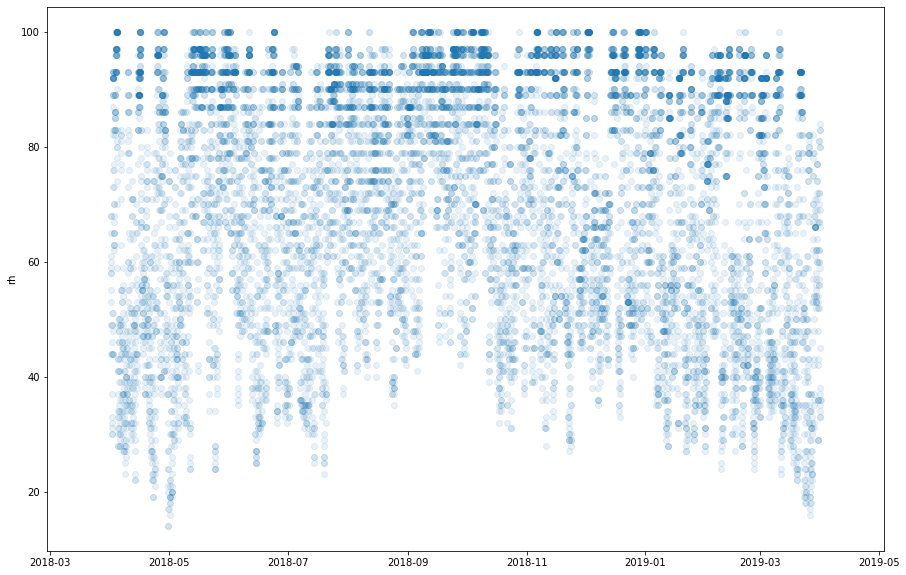

--- temp
Min: -14
Max: 36


--- vis
Min: 0.1
Max: 16.0


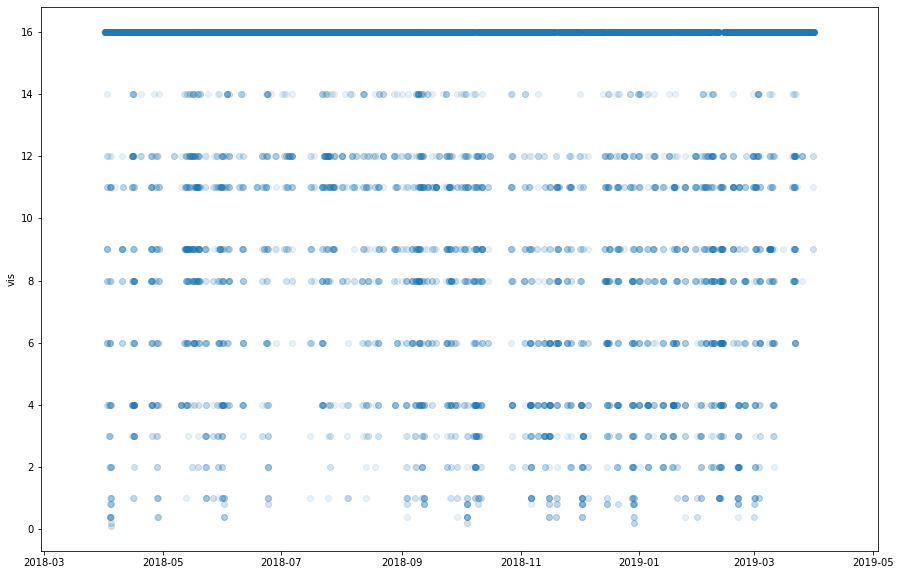

--- wc
Min: -23.0
Max: 36.0


--- wspd
Min: 0.0
Max: 61.0


In [10]:
for c in consider_only:
    print('---', c)
    print('Min:', weather_raw[c].min())
    print('Max:', weather_raw[c].max())
    plt.figure(figsize=(15, 10))
    plt.ylabel(c)
    plt.scatter('valid_time_philadelphia', c, data=weather_raw, alpha=0.1)
    plt.show()

Saving with raw data for testing :)
* No interpolating for now

In [11]:
weather_raw.rename(columns={'dewPt': 'dew_pt', 'valid_time_philadelphia': 'time'}, inplace=True)
consider_only = [
    'time', 'dew_pt', 'feels_like', 'heat_index', 'precip_hrly',
    'rh', 'temp', 'vis', 'wc', 'wspd'
]
weather_raw[consider_only].to_csv('../../data/philadelphia/training-sets/processing/weather.csv', index=False)